In [120]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
WORKSPACE_PATH  = os.environ['WORKSPACE_PATH']
plt.style.use(WORKSPACE_PATH+'/ROMNet/romnet/extra/postprocessing/presentation.mplstyle')

from numpy import diff

import cantera as ct

In [96]:
OutputDir  = WORKSPACE_PATH+'/ROMNet/Data/0DReact_10Cases/'
TestDir    = WORKSPACE_PATH+'/ROMNet/Data/0DReact_10Cases_Test/'

CasesVec   = [1]#[0,2,4,6,8]
DirDir     = OutputDir #OutputDir #TestDir

NVarsRed   = 5

InputVars  = []
for i in range(NVarsRed):
    InputVars.append('PC_'+str(i+1))
InputVars

['PC_1', 'PC_2', 'PC_3', 'PC_4', 'PC_5']

In [97]:
T0sVec = pd.read_csv(OutputDir+'/orig_data/T0s.csv', header=None).to_numpy()

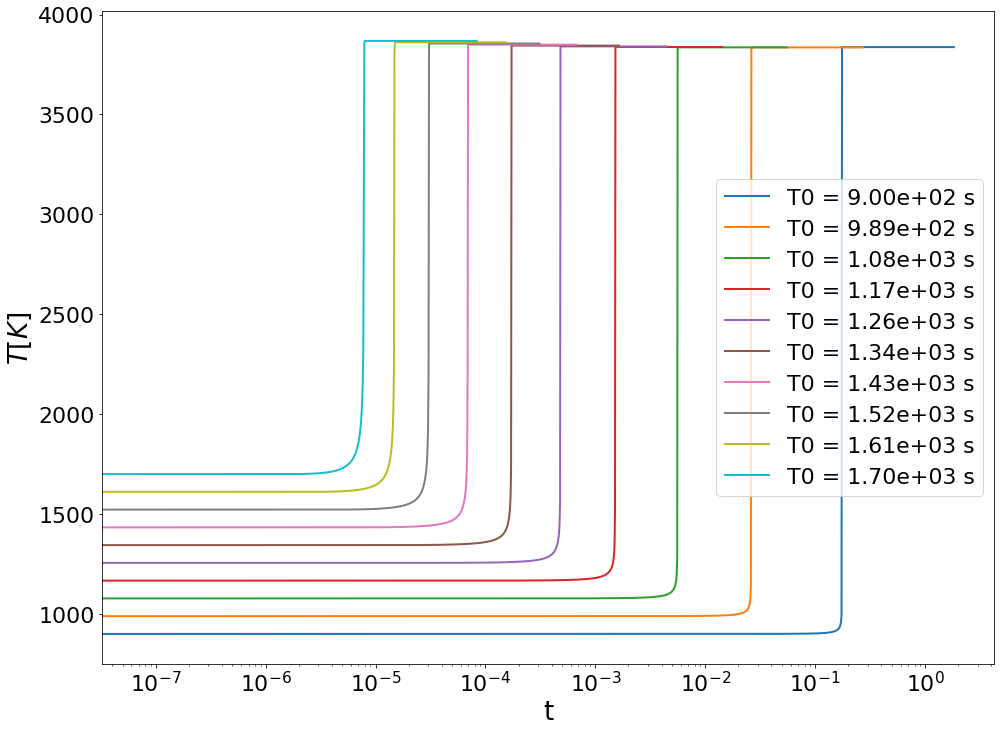

In [98]:
fig  = plt.figure(figsize=(16,12))
for i in range(len(T0sVec)):
    Data1 = pd.read_csv(OutputDir+'/orig_data/y.csv.'+str(i+1))
    
    plt.plot(Data1['t'], Data1['T'], label='T0 = '+"{:.2e}".format(T0sVec[i,0])+' s')
    
    plt.xlabel('t')
    plt.ylabel(r'$T [K]$')
    plt.legend()
    plt.xscale('log')

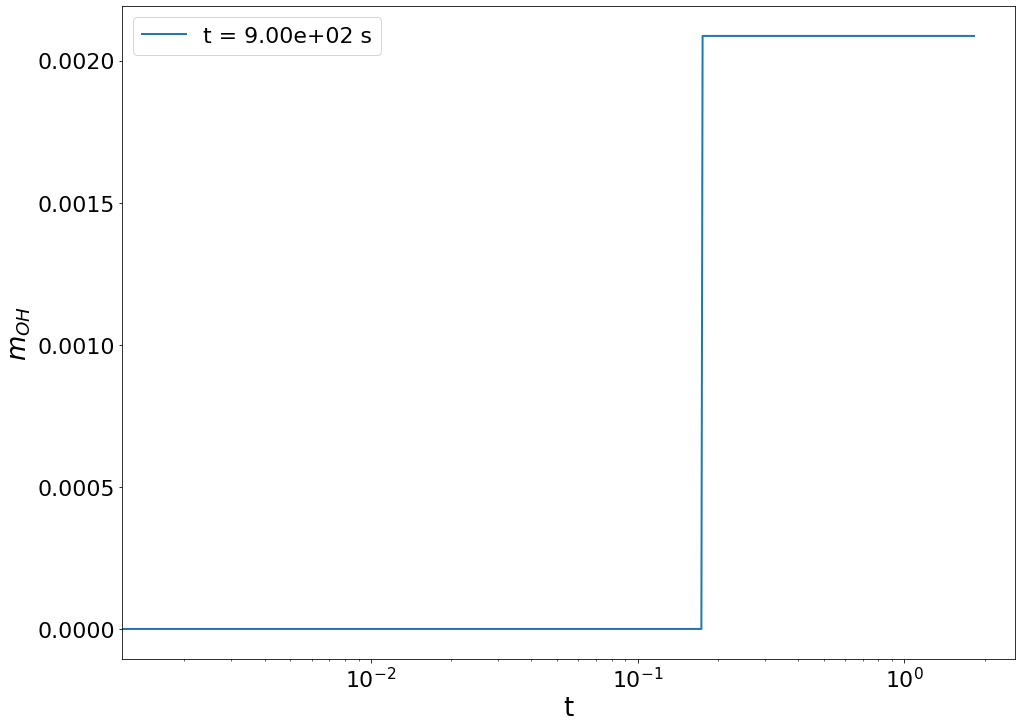

In [110]:
fig  = plt.figure(figsize=(16,12))
for i in range(1):#0):
    Data1 = pd.read_csv(OutputDir+'/orig_data/y.csv.'+str(i+1))
    
    plt.plot(Data1.t, Data1.H, label='t = '+"{:.2e}".format(T0sVec[i,0])+' s')
    
    plt.xlabel('t')
    plt.ylabel(r'$m_{OH}$')
    plt.legend()
    plt.xscale('log')

y0_pca =  [-6.82816094e+01 -2.27392126e-02  1.83851081e-02 -1.68760491e-02
 -3.97085191e-03]


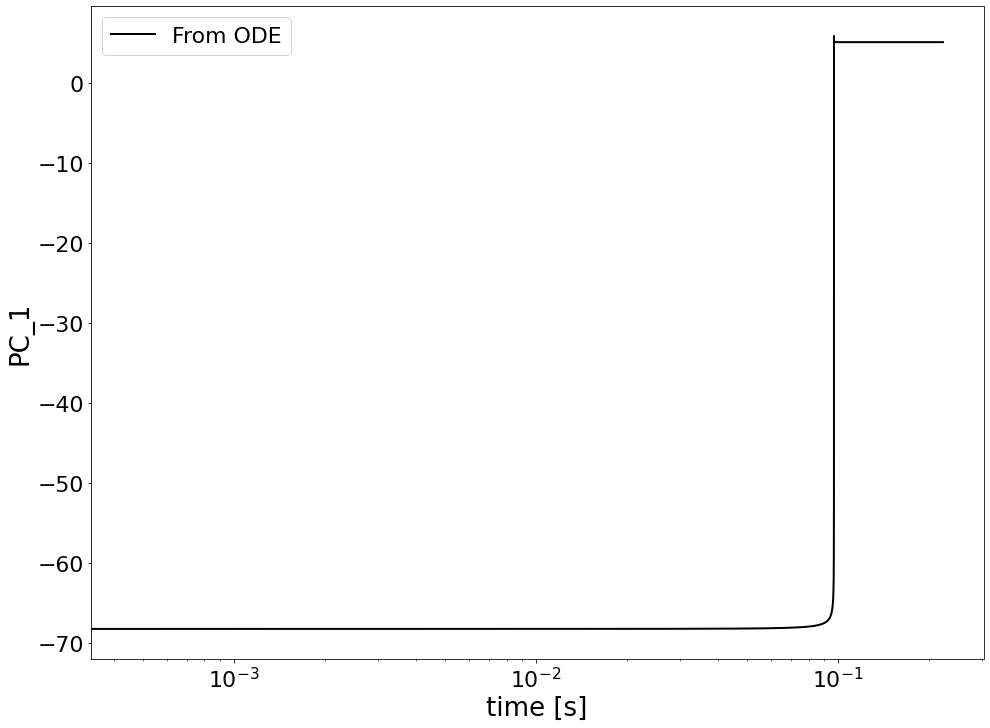

In [6]:
### Evaluating on Test Data

T0sVec = pd.read_csv(OutputDir+'/orig_data/T0s.csv', header=None).to_numpy()
iPC    = 0

fig = plt.figure(figsize=(16,12))
for iTest in CasesVec:
    T0                           = T0sVec[iTest]

    FileName                     = DirDir+'/pc_data_'+str(NVarsRed)+'/PC.csv.'+str(iTest+1)
    InputDataTest                = pd.read_csv(FileName, header=0)
    tVec                         = InputDataTest['t'].to_numpy()
    #InputDataTest['log10(Rest)'] = RestVal * np.ones(len(tVec))
    yMat_pca                     = InputDataTest[InputVars].to_numpy()
    y0_pca                       = yMat_pca[0,:]
    print('y0_pca = ', y0_pca)
    
    plt.plot(tVec, yMat_pca[:,iPC], '-k', label='From ODE', lw=2)

plt.xscale('log')
plt.xlabel('time [s]')
plt.ylabel('PC_'+str(iPC+1))
plt.legend()

In [7]:
FileName = OutputDir+'/pca_'+str(NVarsRed)+'/A.csv'
A        = pd.read_csv(FileName, delimiter=',', header=None).to_numpy()

FileName = OutputDir+'/pca_'+str(NVarsRed)+'/C.csv'
C        = pd.read_csv(FileName, delimiter=',', header=None).to_numpy()

FileName = OutputDir+'/pca_'+str(NVarsRed)+'/D.csv'
D        = pd.read_csv(FileName, delimiter=',', header=None).to_numpy()

In [8]:
yMat_    = (yMat_pca.dot(A))*D[:,0] + C[:,0]

iVar =  6


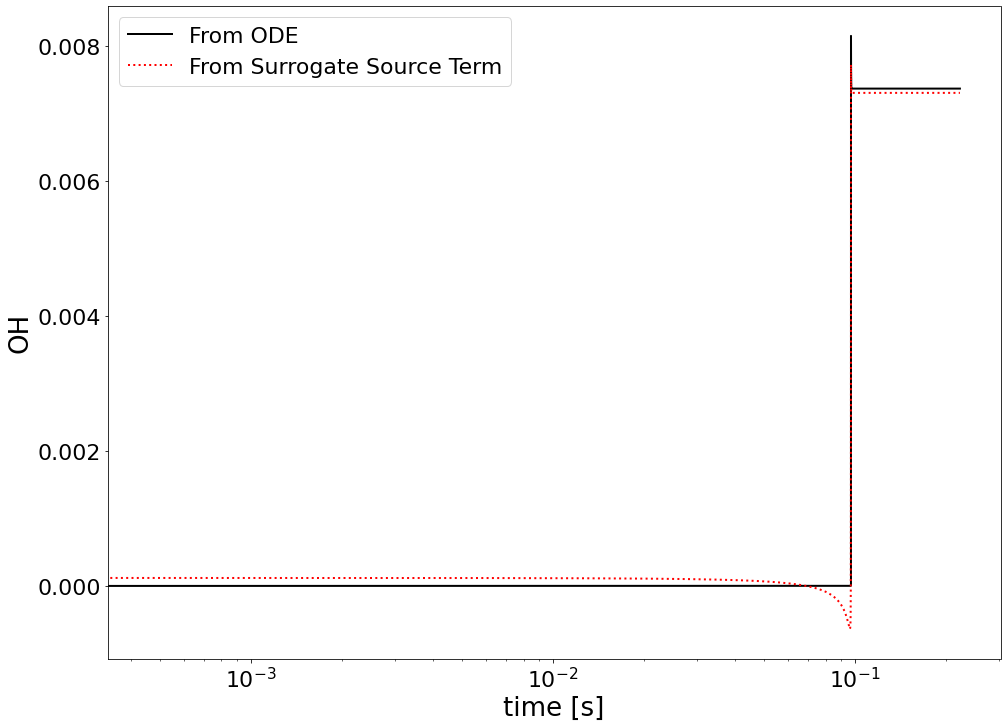

In [9]:
FileName = DirDir + '/orig_data/y.csv.1'
Data     = pd.read_csv(FileName, header=0)
VarNames = list(Data.columns)

VarOI    = 'OH'
for iVar in range(1,len(VarNames)):
    if (VarNames[iVar] == VarOI):
        print('iVar = ', iVar)
        break
        
fig = plt.figure(figsize=(16,12))
for iTest in CasesVec:

    FileName     = DirDir + '/orig_data/y.csv.'+str(iTest+1)
    Data         = pd.read_csv(FileName, header=0)
    tVec         = Data.to_numpy()[:,0]
    yMat         = Data.to_numpy()[:,1:]
        
    plt.plot(tVec, yMat[:,iVar-1],  '-k', label='From ODE',                   lw=2)
    plt.plot(tVec, yMat_[:,iVar-1], ':r', label='From Surrogate Source Term', lw=2)

plt.xscale('log')
plt.xlabel('time [s]')
plt.ylabel(VarOI)
plt.legend()

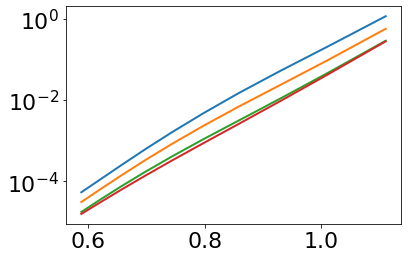

In [64]:
Delays_5 = np.array([[1.1111111111111112, 1.1687706777140048],
[1.0112359550561798, 0.2089800885194467],
[0.9278350515463917, 0.05069190514155617],
[0.8571428571428572, 0.014552745089051845],
[0.7964601769911503, 0.0046364643742002765],
[0.7438016528925621, 0.0016188168150836615],
[0.6976744186046512, 0.0006130354811979898],
[0.656934306569343, 0.0002508693141840508],
[0.6206896551724138, 0.00011142321083351073],
[0.5882352941176471, 5.384324080580021e-05]])

Delays_10 = np.array([[1.1111111111111112, 0.5736587647450282],
[1.0112359550561798, 0.09612503094975443],
[0.9278350515463917, 0.022831088488228027],
[0.8571428571428572, 0.0067722193907174],
[0.7964601769911503, 0.0022734307262149965],
[0.7438016528925621, 0.0008352434920307445],
[0.6976744186046512, 0.0003307980527100989],
[0.656934306569343,  0.00014018249554985135],
[0.6206896551724138, 6.367511832975297e-05],
[0.5882352941176471, 3.0937178853100657e-05]])

Delays_20 = np.array([[1.1111111111111112, 0.29103011984479304],
[1.0112359550561798, 0.04665095628627366],
[0.9278350515463917, 0.010551572173615935],
[0.8571428571428572, 0.0030744876331813575],
[0.7964601769911503, 0.0010658966339826962],
[0.7438016528925621, 0.0004096596886660713],
[0.6976744186046512, 0.00017053189821663656],
[0.656934306569343, 7.566483912652971e-05],
[0.6206896551724138, 3.5501175783922464e-05],
[0.5882352941176471, 1.7627740929057392e-05]])

Delays_20_half = np.array([[1.1111111111111112,0.28137314742506153],
[1.0112359550561798,0.042645659697573134],
[0.9278350515463917,0.009117246902988546],
[0.8571428571428572,0.002536545828949381],
[0.7964601769911503,0.0008495311440178685],
[0.7438016528925621,0.0003260208494578241],
[0.6976744186046512,0.0001372459249622617],
[0.656934306569343,6.249336871828218e-05],
[0.6206896551724138,3.0368101659230782e-05],
[0.5882352941176471,1.5781008628119534e-05]])

plt.plot(Delays_5[:,0], Delays_5[:,1])
plt.plot(Delays_10[:,0], Delays_10[:,1])
plt.plot(Delays_20[:,0], Delays_20[:,1])
plt.plot(Delays_20_half[:,0], Delays_20_half[:,1])
plt.yscale('log')

In [77]:
Delays = np.array([[1.1111111111111112,0.1741338477406572],
[1.0112359550561798,0.025974105682648012],
[0.9278350515463917,0.005546387566505817],
[0.8571428571428572,0.0015061421948243216],
[0.7964601769911503,0.00047908604296259533],
[0.7438016528925621,0.00017205712743850336],
[0.6976744186046512,6.884770772008809e-05],
[0.656934306569343,3.0431753031592618e-05],
[0.6206896551724138,1.4798788868321459e-05],
[0.5882352941176471,7.822718687564532e-06]])

Delayss      = Delays
Delayss[:,1] = np.log10(Delays[:,1])

In [78]:
from scipy.optimize import curve_fit

def lin(x, a, b):
    return a*x + b

pars, cov = curve_fit(f=lin, xdata=Delayss[:,0], ydata=Delayss[:,1], p0=[0, 0], bounds=(-np.inf, np.inf))

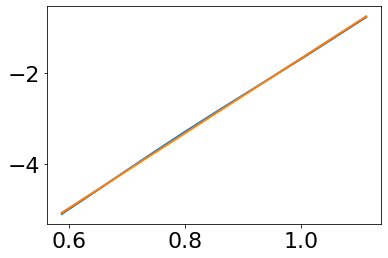

In [79]:
one_over = 1000./np.linspace(900, 1700, 100)
y_pred   = one_over*pars[0] + pars[1]

plt.plot(Delays[:,0], Delays[:,1])
plt.plot(one_over, y_pred)

In [81]:
np.maximum(pars, 0.)

array([8.30140399, 0.        ])

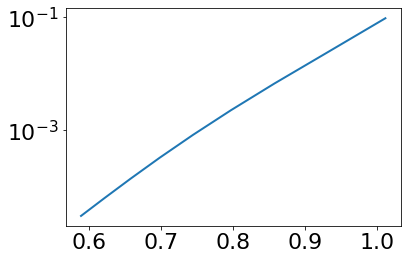

In [111]:
from scipy.stats import qmc

sampler = qmc.LatinHypercube(d=3)
sample  = sampler.random(n=100)

l_bounds = [900,  5.*ct.one_atm, 0.5]
u_bounds = [1700, 20.*ct.one_atm, 1.0]
qmc.scale(sample, l_bounds, u_bounds)

qmc.discrepancy(sample)

ImportError: cannot import name 'qmc' from 'scipy.stats' (/usr/local/lib/python3.8/site-packages/scipy/stats/__init__.py)

In [121]:
import pyDOE

In [126]:
ICs

array([[1.41600000e+03, 8.48596875e+05, 9.77500000e-01],
       [1.69600000e+03, 1.85171438e+06, 8.57500000e-01],
       [9.60000000e+02, 1.83651562e+06, 9.12500000e-01],
       [1.17600000e+03, 1.54773938e+06, 9.97500000e-01],
       [1.66400000e+03, 7.42205625e+05, 8.32500000e-01],
       [1.45600000e+03, 1.89731062e+06, 7.77500000e-01],
       [9.84000000e+02, 1.69972688e+06, 9.72500000e-01],
       [1.16800000e+03, 7.57404375e+05, 5.22500000e-01],
       [9.92000000e+02, 6.96609375e+05, 7.92500000e-01],
       [1.64000000e+03, 1.91250938e+06, 7.12500000e-01],
       [1.34400000e+03, 6.51013125e+05, 5.92500000e-01],
       [1.01600000e+03, 1.39575188e+06, 8.92500000e-01],
       [1.32000000e+03, 1.03098188e+06, 9.47500000e-01],
       [1.47200000e+03, 5.14224375e+05, 8.97500000e-01],
       [1.68800000e+03, 1.38055312e+06, 9.07500000e-01],
       [1.23200000e+03, 1.88211188e+06, 9.92500000e-01],
       [1.65600000e+03, 5.59820625e+05, 7.72500000e-01],
       [1.55200000e+03, 1.30455